In [1]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 5.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
from sklearn import linear_model

In [2]:
# The code was removed by DSX for sharing.

,Material,Usura_mat_g,Durezza_Disco,Comprex_LP,Comprex_LR,Grindo_LP,Grindo_LR,PistoneCpx,Inerzia,Vmax,...,183,184,185,186,187,188,189,190,191,192
0,1.000000,-0.747952,0.880503,0.673423,0.677704,0.129032,0.062284,1,0.272727,0.434783,...,0.539481,0.534210,0.740648,0.438179,0.516201,0.320636,0.623794,0.298908,0.689731,0.515836
1,0.997764,-0.406753,0.805031,0.675676,0.631347,0.206452,0.159170,1,0.272727,0.434783,...,0.675487,0.691069,0.701569,0.363226,0.450055,0.331382,0.711773,0.343537,0.808774,0.616340
2,0.996452,1.168472,0.440252,0.801802,0.779249,0.218280,0.156863,1,0.272727,0.434783,...,0.539481,0.534210,0.740648,0.438179,0.516201,0.320636,0.623794,0.298908,0.689731,0.515836
3,0.996452,1.061654,0.427673,0.774775,0.854305,0.246237,0.222607,1,0.272727,0.434783,...,0.539481,0.534210,0.740648,0.438179,0.516201,0.320636,0.623794,0.298908,0.689731,0.515836
4,0.995529,0.132692,0.786164,0.641892,0.635762,0.118280,0.071511,1,0.272727,0.434783,...,0.613546,0.546417,0.741318,0.444433,0.520374,0.323024,0.615110,0.295961,0.698293,0.475325


In [3]:
df_data_1.describe()

,Material,Usura_mat_g,Durezza_Disco,Comprex_LP,Comprex_LR,Grindo_LP,Grindo_LR,PistoneCpx,Inerzia,Vmax,...,183,184,185,186,187,188,189,190,191,192
count,651.000000,6.510000e+02,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,...,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,0.429083,-1.309756e-16,0.667314,0.688345,0.692353,0.776907,0.761265,0.963134,0.214020,0.521405,...,0.548232,0.538339,0.742188,0.438943,0.516562,0.320173,0.622331,0.296796,0.689433,0.514783
std,0.304273,1.000000e+00,0.163488,0.098489,0.097459,0.352160,0.376910,0.188579,0.143991,0.118261,...,0.105038,0.078939,0.053011,0.055789,0.063056,0.034139,0.082020,0.057546,0.071892,0.118418
min,0.000000,-2.310316e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.205808,-6.559910e-01,0.578616,0.637387,0.644592,0.331183,0.279700,1.000000,0.272727,0.434783,...,0.504905,0.510966,0.726583,0.416869,0.495068,0.316709,0.589375,0.280083,0.662377,0.472058
50%,0.299878,1.074265e-01,0.698113,0.693694,0.697572,1.000000,1.000000,1.000000,0.272727,0.500000,...,0.542975,0.540284,0.741953,0.437364,0.514874,0.320939,0.623472,0.298632,0.689767,0.513647
75%,0.663256,7.925684e-01,0.786164,0.752252,0.757174,1.000000,1.000000,1.000000,0.272727,0.652174,...,0.589114,0.570434,0.759166,0.461319,0.534730,0.325591,0.653145,0.312580,0.716929,0.568726
max,1.000000,1.928140e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


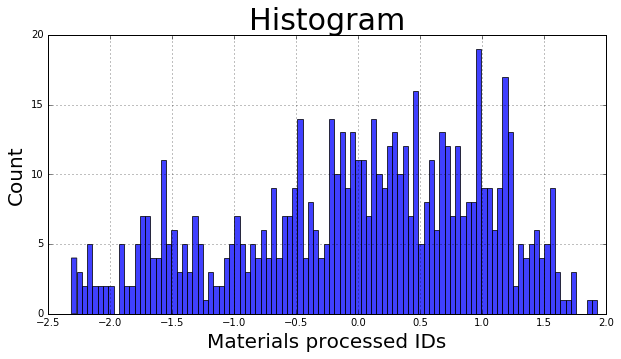

In [4]:
x = df_data_1["Usura_mat_g"].values

plt.hist(x, 100, facecolor='blue', alpha=0.75)

plt.title('Histogram', fontsize=30)
plt.xlabel('Materials processed IDs', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.grid(True)

plt.show()

In [5]:
df_data_1["flag"] = df_data_1["Usura_mat_g"].values < df_data_1["Usura_mat_g"].mean()

y = df_data_1["Usura_mat_g"].values

holdout_split_flag = df_data_1["flag"].values

#df_data_2 = df_data_1.drop("flag", 1)
df_data_2 = df_data_1.drop("Usura_mat_g", 1)

X = df_data_2.values
# print df_data_1.corr()

print X.shape
print y.shape

(651, 235)
(651,)


In [6]:
from sklearn.cross_validation import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(holdout_split_flag, 1, test_size=.15, random_state=0)
for train_index, test_index in sss:
    #print "TRAIN indices:", train_index, ", TEST indices:", test_index 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print "TRAIN-set shape:" + str(X_train.shape) + ", TEST-set shape:" + str(X_test.shape)


TRAIN-set shape:(553, 235), TEST-set shape:(98, 235)


In [7]:
df_X_train = pd.DataFrame(data= X_train, columns=df_data_2.columns)
df_X_train_f = df_X_train.drop("flag", 1)
df_X_train_f = df_X_train_f.drop("Material", 1)
cv_split_flag = df_X_train["flag"].values
print (df_X_train.shape)
print (df_X_train_f.shape) # training set finale

df_X_test = pd.DataFrame(data= X_test, columns=df_data_2.columns)
df_X_test_f = df_X_test.drop("flag", 1)
df_X_test_f = df_X_test_f.drop("Material", 1)
print (df_X_test.shape)
print (df_X_test_f.shape) # test set finale

X_train = df_X_train_f.values
X_test = df_X_test_f.values

(553, 235)
(553, 233)
(98, 235)
(98, 233)


In [8]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(553, 233)
(98, 233)
(553,)
(98,)


## Cross validation

CV SPLIT FLAG SHAPE= (553,)
X TRAIN SHAPE (553, 233)
Y TRAIN SHAPE (553,)
BEST ALPHA (RSS) =  1.32  RSS:  24.3783690917
BEST ALPHA (R2) =  1.3  R2:  0.64260587905


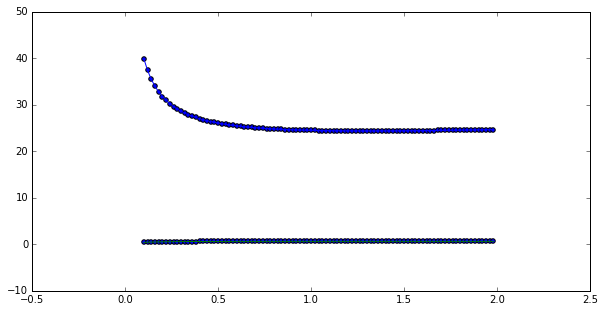

In [44]:
from sklearn.cross_validation import StratifiedKFold
n_folds=8

skf = StratifiedKFold(cv_split_flag, n_folds=n_folds)
print "CV SPLIT FLAG SHAPE=", cv_split_flag.shape
print "X TRAIN SHAPE", X_train.shape
print "Y TRAIN SHAPE", y_train.shape

set_of_alphas = np.arange(0.1, 2, step=0.02)
rss = np.zeros(len(set_of_alphas))
r2 = np.zeros(len(set_of_alphas))

for cv_train_index, cv_val_index in skf:
    X_cv_train, X_cv_val = X_train[cv_train_index], X_train[cv_val_index]
    y_cv_train, y_cv_val = y_train[cv_train_index], y_train[cv_val_index]

    for alpha_idx, alpha in enumerate(set_of_alphas):
        ridge_cv_reg = linear_model.Ridge(alpha = alpha)
        ridge_cv_reg.fit(X_cv_train, y_cv_train)
        yp_cv_ridge = ridge_cv_reg.predict(X_cv_val)
        rss_cv_ridge = sum((yp_cv_ridge - y_cv_val) *(yp_cv_ridge - y_cv_val))
        r2_cv_ridge = ridge_cv_reg.score(X_cv_val, y_cv_val)
        #print "alpha = " + str(alpha) +  " RSS = " + str(rss_cv_ridge) + " R2= " +str(r2_cv_ridge)
        rss[alpha_idx] = rss[alpha_idx] + rss_cv_ridge
        r2[alpha_idx] = r2[alpha_idx] + r2_cv_ridge
    #print "STOP"
        
# Get the average for each alpha value out of all the iterations of the cross validation
rss = rss / n_folds
r2 = r2 / n_folds

plt.scatter(set_of_alphas, rss)
plt.plot(set_of_alphas, rss)
#plt.axis([0, 2, 0.1, 0.7])

print "BEST ALPHA (RSS) = ", set_of_alphas[np.argmin(rss)], " RSS: ", np.amin(rss)
print "BEST ALPHA (R2) = ", set_of_alphas[np.argmax(r2)], " R2: ", np.amax(r2)

plt.scatter(set_of_alphas, r2)
plt.plot(set_of_alphas, r2)
#plt.axis([0, 2, 0, 1])


alpha rss = 1.32
alpha r2= 1.3
RSS = 21.4840320397 R2= 0.782951394223


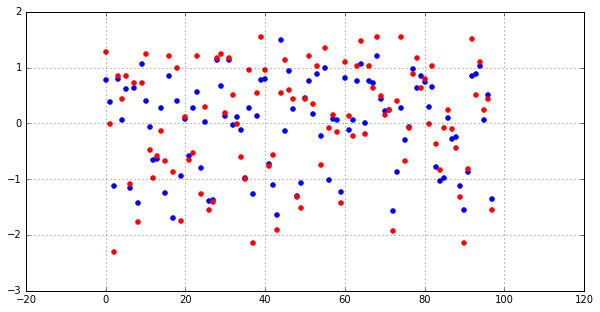

In [10]:
best_alpha_rss = set_of_alphas[np.argmin(rss)]
best_alpha_r2 = set_of_alphas[np.argmax(r2)]
print "alpha rss = " + str(best_alpha_rss)
print "alpha r2= " + str(best_alpha_r2)

ridge_reg = linear_model.Ridge(alpha = best_alpha_rss)
ridge_reg.fit(X_train, y_train)

yp_ridge = ridge_reg.predict(X_test)
rss_ridge = sum((yp_ridge - y_test) *(yp_ridge - y_test))
r2_ridge = ridge_reg.score(X_test, y_test)

print "RSS = " + str(rss_ridge) + " R2= " +str(r2_ridge)


#plt.axis([-1,101,0,0.1])
plt.scatter(np.arange(0, len(y_test)), yp_ridge, color='b')
plt.scatter(np.arange(0, len(y_test)), y_test, color='r')
plt.grid(True)

plt.show()

CV SPLIT FLAG SHAPE= (553,)
X TRAIN SHAPE (553, 233)
Y TRAIN SHAPE (553,)
BEST ALPHA (RSS) =  0.0018  RSS:  23.9883174326
BEST ALPHA (R2) =  0.0017  R2:  0.649347580397


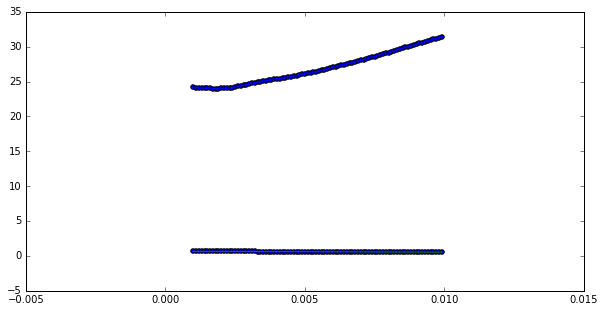

In [58]:
from sklearn.cross_validation import StratifiedKFold
n_folds=8

skf = StratifiedKFold(cv_split_flag, n_folds=n_folds)
print "CV SPLIT FLAG SHAPE=", cv_split_flag.shape
print "X TRAIN SHAPE", X_train.shape
print "Y TRAIN SHAPE", y_train.shape

# set_of_alphas = np.arange(-6, 6, step=0.1)
#set_of_alphas = np.arange(0.01, 1, step=0.01)
set_of_alphas = np.arange(0.001, 0.01, step=0.0001)
rss = np.zeros(len(set_of_alphas))
r2 = np.zeros(len(set_of_alphas))

for cv_train_index, cv_val_index in skf:
    X_cv_train, X_cv_val = X_train[cv_train_index], X_train[cv_val_index]
    y_cv_train, y_cv_val = y_train[cv_train_index], y_train[cv_val_index]

    for alpha_idx, alpha in enumerate(set_of_alphas):
        ridge_cv_reg = linear_model.Lasso(alpha = alpha)
        ridge_cv_reg.fit(X_cv_train, y_cv_train)
        yp_cv_ridge = ridge_cv_reg.predict(X_cv_val)
        rss_cv_ridge = sum((yp_cv_ridge - y_cv_val) *(yp_cv_ridge - y_cv_val))
        r2_cv_ridge = ridge_cv_reg.score(X_cv_val, y_cv_val)
        #print "alpha = " + str(alpha) +  " RSS = " + str(rss_cv_ridge) + " R2= " +str(r2_cv_ridge)
        rss[alpha_idx] = rss[alpha_idx] + rss_cv_ridge
        r2[alpha_idx] = r2[alpha_idx] + r2_cv_ridge
    #print "STOP"
        
# Get the average for each alpha value out of all the iterations of the cross validation
rss = rss / n_folds
r2 = r2 / n_folds

plt.scatter(set_of_alphas, rss)
plt.plot(set_of_alphas, rss)
#plt.axis([0, 2, 0.1, 0.7])

print "BEST ALPHA (RSS) = ", set_of_alphas[np.argmin(rss)], " RSS: ", np.amin(rss)
print "BEST ALPHA (R2) = ", set_of_alphas[np.argmax(r2)], " R2: ", np.amax(r2)

plt.scatter(set_of_alphas, r2)
plt.plot(set_of_alphas, r2)
#plt.axis([0, 1, 0, 0.5])

In [12]:
ridge_cv_reg = linear_model.Lasso(alpha = set_of_alphas[np.argmin(rss)])
ridge_cv_reg.fit(X_train, y_train)
print (ridge_cv_reg.coef_ > 0).sum(), ridge_cv_reg.coef_.shape[0]

53 233


alpha rss = 0.002
alpha r2= 0.002
RSS = 21.79104198 R2= 0.779849738101


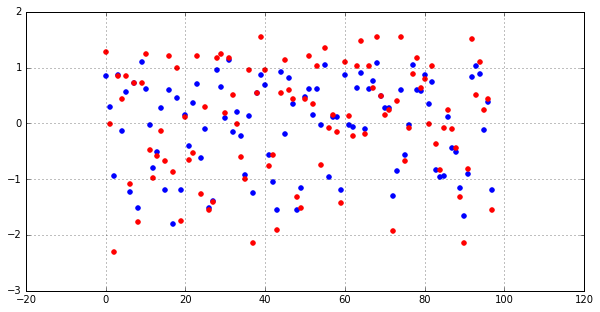

In [13]:
best_alpha_rss = set_of_alphas[np.argmin(rss)]
best_alpha_r2 = set_of_alphas[np.argmax(r2)]
print "alpha rss = " + str(best_alpha_rss)
print "alpha r2= " + str(best_alpha_r2)

ridge_reg = linear_model.Lasso(alpha = best_alpha_rss)
ridge_reg.fit(X_train, y_train)

yp_ridge = ridge_reg.predict(X_test)
rss_ridge = sum((yp_ridge - y_test) *(yp_ridge - y_test))
r2_ridge = ridge_reg.score(X_test, y_test)

print "RSS = " + str(rss_ridge) + " R2= " +str(r2_ridge)


#plt.axis([-1,101,0,1.4])
plt.scatter(np.arange(0, len(y_test)), yp_ridge, color='b')
plt.scatter(np.arange(0, len(y_test)), y_test, color='r')
plt.grid(True)

plt.show()

In [57]:
from sklearn.cross_validation import StratifiedKFold
n_folds=8

skf = StratifiedKFold(cv_split_flag, n_folds=n_folds)
print "CV SPLIT FLAG SHAPE=", cv_split_flag.shape
print "X TRAIN SHAPE", X_train.shape
print "Y TRAIN SHAPE", y_train.shape

set_of_l1_ratios = np.arange(0.1, 1, step=0.1)
set_of_alpha = np.arange(0.001, 0.01, step=0.001)

s = [(x,y) for x in set_of_l1_ratios for y in set_of_alpha]
print len(s)

rss = np.zeros(len(s))
r2 = np.zeros(len(s))

i = 0
for cv_train_index, cv_val_index in skf:
    X_cv_train, X_cv_val = X_train[cv_train_index], X_train[cv_val_index]
    y_cv_train, y_cv_val = y_train[cv_train_index], y_train[cv_val_index]

    for idx, sp in enumerate(s):
        en_cv_reg = linear_model.ElasticNet(l1_ratio = sp[0], alpha=sp[1])
        en_cv_reg.fit(X_cv_train, y_cv_train)
        yp_cv_en = en_cv_reg.predict(X_cv_val)
        rss_cv_en = sum((yp_cv_en - y_cv_val) *(yp_cv_en - y_cv_val))
        r2_cv_en = en_cv_reg.score(X_cv_val, y_cv_val)
        rss[idx] = rss[idx] + rss_cv_en
        r2[idx] = r2[idx] + r2_cv_en
        if i%100 == 0:
            #print i
            pass
        i = i+1
        
# Get the average for each alpha value out of all the iterations of the cross validation
rss = rss / n_folds
r2 = r2 / n_folds
 
print "BEST L1_Ratio (RSS) = ", s[np.argmin(rss)], " RSS = ", np.amin(rss)
print "BEST L1_Ratio (R2) = ", s[np.argmax(r2)], " R2 = ", np.amax(r2)

CV SPLIT FLAG SHAPE= (553,)
X TRAIN SHAPE (553, 233)
Y TRAIN SHAPE (553,)
81
BEST L1_Ratio (RSS) =  (0.40000000000000002, 0.002)  RSS =  23.3957625828
BEST L1_Ratio (R2) =  (0.40000000000000002, 0.002)  R2 =  0.657720749566


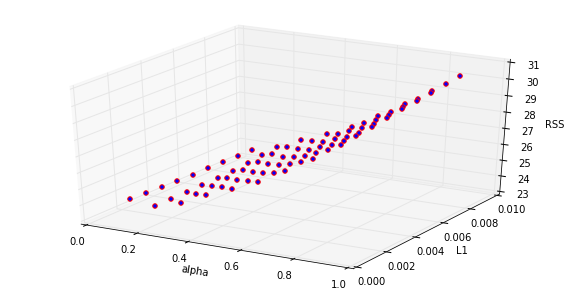

In [63]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = map(lambda x: x[0], s)
Y = map(lambda x: x[1], s)
Z = rss

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for i in np.arange(len(X)):
    ax.scatter(X[i], Y[i], rss[i], color = "r")

ax.set_xlabel('alpha')
ax.set_ylabel('L1')
ax.set_zlabel('RSS')

plt.show()

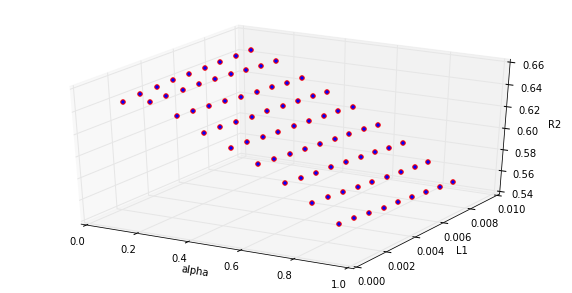

In [64]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = map(lambda x: x[0], s)
Y = map(lambda x: x[1], s)
Z = rss

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for i in np.arange(len(X)):
    ax.scatter(X[i], Y[i], r2[i], color = "r")
    ax.plot_surface(X[i], Y[i], r2[i], color = "b")

ax.set_xlabel('alpha')
ax.set_ylabel('L1')
ax.set_zlabel('R2')

plt.show()